# Modelo "Regressão Logística"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

%matplotlib inline

## Classificação Binária

In [2]:
df = pd.read_csv('bases/insurance_data.csv')
df.head()

,age,bought_insurance
0,18,0
1,18,0
2,19,0
3,19,0
4,21,0


In [3]:
reg = LogisticRegression()
reg.fit(df[['age']], df.bought_insurance)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
reg.predict([[43], [25]])

array([1, 0])

## Em forma gráfica

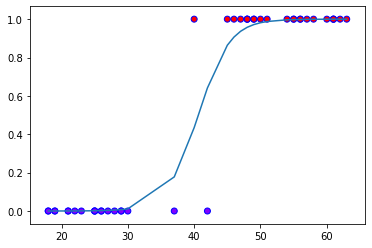

In [6]:
from scipy.optimize import curve_fit
import numpy as np

def funcao_sigmoide(x, x0, k):
    y = 1.0 / (1 + np.exp(-np.dot(k, x-x0)))
    return y

popt, pconv = curve_fit(funcao_sigmoide, df['age'], df.bought_insurance)
sigmoide = funcao_sigmoide(df['age'], *popt)

plt.plot(df['age'], sigmoide)
plt.scatter(df['age'], df.bought_insurance, c=df.bought_insurance, cmap='rainbow', edgecolors='b')
plt.show()

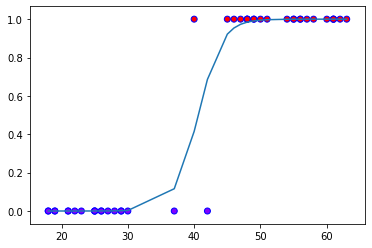

In [7]:
sigmoide = expit(df['age'] * reg.coef_[0][0] + reg.intercept_[0])
plt.plot(df['age'], sigmoide)
plt.scatter(df['age'], df.bought_insurance, c=df.bought_insurance, cmap='rainbow', edgecolors='b')
plt.show()